# **MODEL TRAINING**

This is the notebook used for all training purposes!

### Import useful libraries

In [1]:
# This is the notebook used for all training purposes!
# Firstly, import some useful libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split      # FOR splitting dataset into train and test.

In [2]:
%cd sample_data

/content/sample_data


Notice that this directory has our final dataset called 'final.csv' whose first 38000 rows contain train split and remaining 7000 contain test split.

In [3]:
!ls

anscombe.json		     california_housing_train.csv  mnist_test.csv	  README.md
california_housing_test.csv  final.csv			   mnist_train_small.csv


### Load the Dataset and Split into Train and Test

From the report, you already know how this is all working. We want a train split of 38000 rows and test split of 7000 rows. Thus, the train_test_split function will split it in that sense. Using **random_state = 42** ensures that whenever you run this, the same split is generated. **Stratify = y** ensures equivalent distribution of data features in both splits as detailed in 'train/test.ipynb'.

In [4]:
# Load the training split and test split

data = pd.read_csv('final.csv')
data = data.dropna()    # Remove any invalid rows. This will produce at 45552 rows. PRE-PROCESSING FINAL STEP.

X = data.drop('income_0', axis=1)       # axis = 1 means drop this income column. Retain just features.
y = data['income_0']

# Performed stratified split into training (38000 rows) and test (7000 rows)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 38000, test_size=7000, random_state=42, stratify=y)

# Concatenated X and y for both training and test sets
train_set = pd.concat([X_train, y_train], axis=1)  # 38,000 rows
test_set = pd.concat([X_test, y_test], axis=1)     # 7,000 rows

# X_train has input features for training and y_train has corresponding labels.

print(train_set.shape)
print(test_set.shape)


(38000, 14)
(7000, 14)


## Training Model of Choice: **Random Forest Classifier**

We chose the RFC for our classification task. Below we import it and then train it and document its accuracy values.

**Libraries:**
1. **sklearn**: This is an abbreviation for scikit-learn, which is a popular machine learning library in Python. Scikit-learn provides various tools for machine learning, including algorithms for classification, regression, clustering, and more.

2. **ensemble**: This is a module within scikit-learn that contains ensemble learning methods. Ensemble methods combine multiple individual models to create a stronger, more robust model. The RandomForestClassifier is one such ensemble learning algorithm.

Import the RandomForestClassifier class from the scikit-learn library's ensemble module.

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
# cREATING a RF classifier
clf = RandomForestClassifier(n_estimators = 100, random_state = 42, criterion = 'entropy')

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
# 'ravel' flatterns the y_train field
clf.fit(X_train, y_train.ravel())

# performing predictions on the test dataset
y_pred = clf.predict(X_test)

Now, import tools to compute accuracy, precision, recall and confusion matrix from the **sklearn.metrics** module.

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Testing set Accuracy: {accuracy*100}%')

# Precision
precision = precision_score(y_test, y_pred)
print(f'Testing set Precision: {precision*100}%')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Testing set Recall: {recall*100}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Testing set Confusion Matrix:\n{conf_matrix}')

Testing set Accuracy: 85.14285714285714%
Testing set Precision: 74.14871438498957%
Testing set Recall: 61.4985590778098%
Testing set Confusion Matrix:
[[4893  372]
 [ 668 1067]]


In [8]:
# performing predictions on the train dataset
x_pred = clf.predict(X_train)

# Compute accuracy on train set.
accuracy = accuracy_score(y_train, x_pred)
print(f'Training set Accuracy: {accuracy*100}%')

# Precision
precision = precision_score(y_train, x_pred)
print(f'Training set Precision: {precision*100}%')

# Recall
recall = recall_score(y_train, x_pred)
print(f'Training set Recall: {recall*100}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_train, x_pred)
print(f'Training set Confusion Matrix:\n{conf_matrix}')

Training set Accuracy: 99.98947368421052%
Training set Precision: 99.98937977909941%
Training set Recall: 99.96814610320662%
Training set Confusion Matrix:
[[28581     1]
 [    3  9415]]


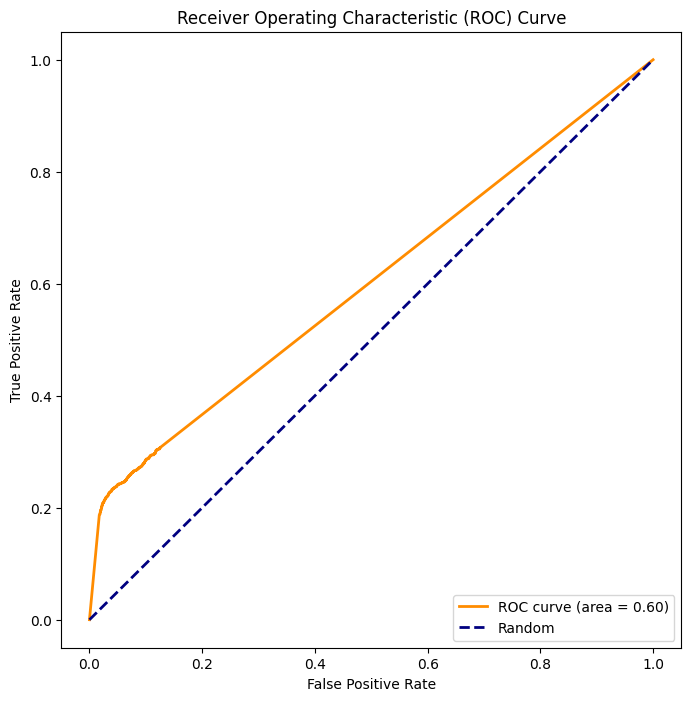

In [17]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

This finishes the training for our Random Forest Classifier. We get an accuracy of **85.14%** on test set and **99.98%** on training set.

## **Testing Accuracy using Other Models**

### Support Vector Machines

First import the SVC (Support Vector Classifier) from SVM module and create an instance of it.

In [9]:
from sklearn.svm import SVC

In [10]:
# Create an instance of the SVM classifier
svm_classifier = SVC(C=1.0, kernel='rbf', random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_classifier.predict(X_test)

# Make predictions on the train data
x_pred_svm = svm_classifier.predict(X_train)

In [11]:
# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Testing set Accuracy: {accuracy_svm*100}%')

# Precision
precision_svm = precision_score(y_test, y_pred_svm)
print(f'Testing set Precision: {precision_svm*100}%')

# Recall
recall_svm = recall_score(y_test, y_pred_svm)
print(f'Testing set Recall: {recall_svm*100}%')

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(f'Testing set Confusion Matrix:\n{conf_matrix_svm}')



Testing set Accuracy: 79.0%
Testing set Precision: 94.61279461279462%
Testing set Recall: 16.195965417867438%
Testing set Confusion Matrix:
[[5249   16]
 [1454  281]]


In [12]:

# Compute accuracy on train set.
accuracy_svm = accuracy_score(y_train, x_pred_svm)
print(f'Training set Accuracy: {accuracy_svm*100}%')

# Precision
precision_svm = precision_score(y_train, x_pred_svm)
print(f'Training set Precision: {precision_svm*100}%')

# Recall
recall_svm = recall_score(y_train, x_pred_svm)
print(f'Training set Recall: {recall_svm*100}%')

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_train, x_pred_svm)
print(f'Training set Confusion Matrix:\n{conf_matrix_svm}')

Training set Accuracy: 79.12105263157895%
Training set Precision: 96.49122807017544%
Training set Recall: 16.351667020598853%
Training set Confusion Matrix:
[[28526    56]
 [ 7878  1540]]


### Logistic Regression

Now we will use the Logistic Regression model for classification.

---



In [12]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression classifier with specified parameters
logreg_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the training data
logreg_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logreg = logreg_classifier.predict(X_test)
x_pred_logreg = logreg_classifier.predict(X_train)

# Evaluate the performance
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Print the results
print(f'Testing Logistic Regression Accuracy: {accuracy_logreg}')
print(f'Testing Logistic Regression Precision: {precision_logreg}')
print(f'Testing Logistic Regression Recall: {recall_logreg}')
print(f'Testing Logistic Regression Confusion Matrix:\n{conf_matrix_logreg}')

# Evaluate the performance
accuracy_logreg = accuracy_score(y_train, x_pred_logreg)
precision_logreg = precision_score(y_train, x_pred_logreg)
recall_logreg = recall_score(y_train, x_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_train, x_pred_logreg)

# Print the results
print(f'Training Logistic Regression Accuracy: {accuracy_logreg}')
print(f'Training Logistic Regression Precision: {precision_logreg}')
print(f'Training Logistic Regression Recall: {recall_logreg}')
print(f'Training Logistic Regression Confusion Matrix:\n{conf_matrix_logreg}')


Testing Logistic Regression Accuracy: 0.7908571428571428
Testing Logistic Regression Precision: 0.7087827426810478
Testing Logistic Regression Recall: 0.26512968299711814
Testing Logistic Regression Confusion Matrix:
[[5076  189]
 [1275  460]]
Training Logistic Regression Accuracy: 0.7913157894736842
Training Logistic Regression Precision: 0.7108843537414966
Training Logistic Regression Recall: 0.2662985771926099
Training Logistic Regression Confusion Matrix:
[[27562  1020]
 [ 6910  2508]]


In [ ]:
# Now, let's plot its decision boundary.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


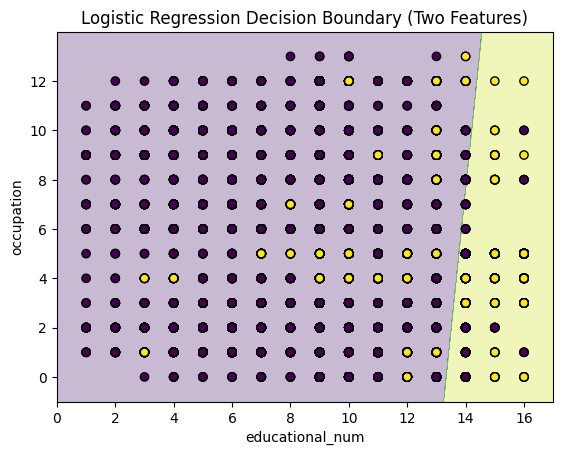

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train contains the features 'MARITAL_STATUS', 'occupation', 'educational_num'
features_to_visualize = ['educational_num', 'occupation']
X_train_subset = X_train[features_to_visualize]

# Create an instance of the Logistic Regression classifier with specified parameters
logreg_classifier_2d = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the subset of the training data
logreg_classifier_2d.fit(X_train_subset, y_train)

# Plot the decision boundary
x_min, x_max = X_train_subset.iloc[:, 0].min() - 1, X_train_subset.iloc[:, 0].max() + 1
y_min, y_max = X_train_subset.iloc[:, 1].min() - 1, X_train_subset.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = logreg_classifier_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Scatter plot of the training data
plt.scatter(X_train_subset.iloc[:, 0], X_train_subset.iloc[:, 1], c=y_train, cmap='viridis', edgecolors='k')
plt.title('Logistic Regression Decision Boundary (Two Features)')
plt.xlabel(features_to_visualize[0])
plt.ylabel(features_to_visualize[1])
plt.show()



### kNN Classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier

K = []
training = []
test = []
scores = {}

for k in range(2, 21):      # Try for different values of k.
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train.ravel())

    training_score = clf.score(X_train, y_train.ravel())
    test_score = clf.score(X_test, y_test.ravel())
    K.append(k)

    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.8719210526315789, 0.7791428571428571]
3 : [0.863578947368421, 0.7591428571428571]
4 : [0.8352105263157895, 0.7841428571428571]
5 : [0.8307894736842105, 0.7701428571428571]
6 : [0.820078947368421, 0.7858571428571428]
7 : [0.8186315789473684, 0.7787142857142857]
8 : [0.8120263157894737, 0.7884285714285715]
9 : [0.8114210526315789, 0.7838571428571428]
10 : [0.8077631578947368, 0.7888571428571428]
11 : [0.8067368421052632, 0.7854285714285715]
12 : [0.8041052631578948, 0.7907142857142857]
13 : [0.8049736842105263, 0.7892857142857143]
14 : [0.8031052631578948, 0.7911428571428571]
15 : [0.8035526315789474, 0.7882857142857143]
16 : [0.8013947368421053, 0.791]
17 : [0.8018947368421052, 0.7905714285714286]
18 : [0.799921052631579, 0.7915714285714286]
19 : [0.8003684210526316, 0.7917142857142857]
20 : [0.7996052631578947, 0.792]
